In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [182]:
dfr=pd.read_csv('tempSiteRatings.csv')
dfd=pd.read_csv('tempUrlMetrics.csv')

In [183]:
#print(dfd['slno'].values==dfr['id'].values)
dfd['rating']=dfr['rating']
dfd.to_csv('data.csv')

In [184]:
data=pd.read_csv('data.csv')
data.drop(['Unnamed: 0'],1, inplace=True)
data['rating'][np.where(data['rating']<4.5)[0]]=-1
data['rating'][np.where(data['rating']>4.5)[0]]=1
data['rating']=data['rating'].astype(int)
data['rating']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0     1
1     1
2    -1
3    -1
4    -1
5    -1
6    -1
7     1
8     1
9     1
10    1
11   -1
12   -1
13   -1
14   -1
15    1
16    1
17    1
18    1
19    1
20    1
21   -1
22   -1
23   -1
24   -1
25    1
26    1
27    1
28    1
29    1
     ..
64    1
65    1
66    1
67    1
68    1
69    1
70   -1
71   -1
72    1
73    1
74    1
75    1
76    1
77   -1
78   -1
79   -1
80   -1
81    1
82    4
83    1
84    1
85    1
86   -1
87   -1
88   -1
89   -1
90    1
91    1
92    1
93    1
Name: rating, Length: 94, dtype: int64

In [185]:

def changeColName(data):
    try:
        columns=['id','url','word_count','body_text_percent','emphasized_body_text_percent','text_position_changes','text_cluster_count','link_count','page_size','graphic_percent','graphic_count','colour_count','font_count','colourfullness','visual_complexity','rating']
        data.columns=columns
    except:
        columns=['id','word_count','body_text_percent','emphasized_body_text_percent','text_position_changes','text_cluster_count','link_count','page_size','graphic_percent','graphic_count','colour_count','font_count','colourfullness','visual_complexity','url']
        data.columns=columns
    return data

In [186]:
def dropMetrics(data):
    try:
        data.drop(['id','url'],1, inplace=True)#,'p1','p2','p4','p6','p7','p10','p11','p12','p13'
    except:
        data.drop(['slno','url'],1, inplace=True)
    return data

In [187]:
def transDF(data):
    x = data.values #returns a numpy array
    columns=data.columns
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    data=pd.DataFrame(x_scaled,columns=columns)
    return data

In [188]:
def catCol(data,col):
    data[col+'_high']=np.zeros(data[col].shape)
    data[col+'_avg']=np.ones(data[col].shape)
    data[col+'_low']=np.zeros(data[col].shape)

    data[col+'_high'][np.where(data[col]>0.5)[0]]=1.0
    data[col+'_avg'][np.where(data[col]>0.5)[0]]=0.0
    data[col+'_avg'][np.where(data[col]<-0.5)[0]]=0.0
    data[col+'_low'][np.where(data[col]<-0.5)[0]]=1.0
    data.drop([col],1,inplace=True)
    return data

In [189]:
def preProcess(data):
    data=changeColName(data)
    data=dropMetrics(data)
    try:
        rating=data['rating']
    except:
        pass
    data=transDF(data)
    data=catCol(data,'word_count')
    data=catCol(data,'visual_complexity')
    data=catCol(data,'colourfullness')
    data=catCol(data,'emphasized_body_text_percent')
    data['bias']=np.ones(data[data.columns[0]].shape)
    try:
        data['rating']=rating
    except:
        pass
    return data

In [190]:
data=preProcess(data)

In [191]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(30,'rating').index

#np.sort(columns)

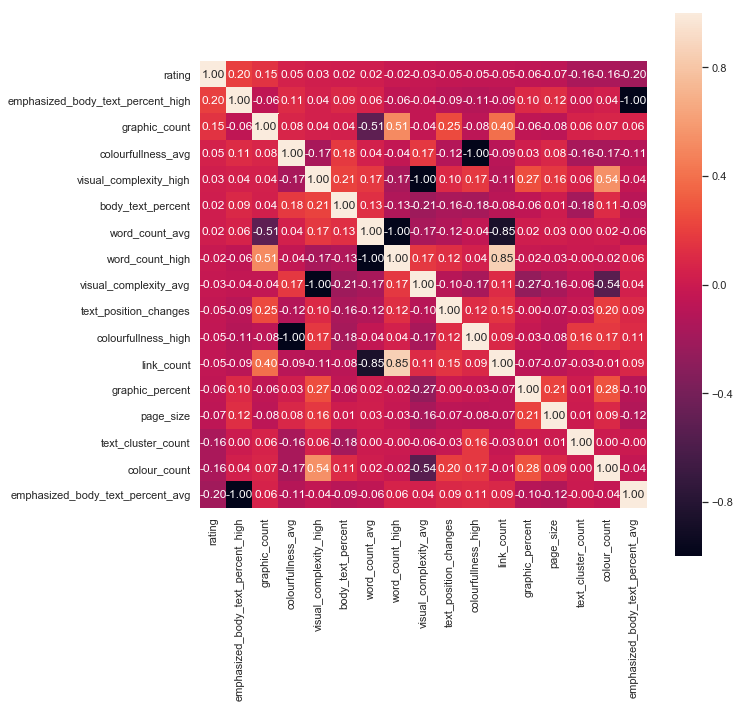

In [192]:
fig, ax = plt.subplots(figsize=(10,10))    
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f',yticklabels=columns.values, xticklabels=columns.values)
plt.savefig('corr.png')
#plt.show()


In [193]:
columns=columns.tolist()
columns=columns[:3]+columns[-2:]
columns=pd.Index(columns)

In [194]:
Y=data['rating'].values
X_temp=data[columns]
X_temp.drop(['rating'],1, inplace=True)
X=X_temp.values

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle='True',test_size=0.2, random_state=1)

In [207]:
def DTClf():
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0)
    return clf
def MLPClf():
    from sklearn.neural_network import MLPClassifier
    clf=MLPClassifier(hidden_layer_sizes=(20, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1)
    return clf
def getAcc(clf):
    from sklearn.metrics import confusion_matrix
    Y_pred=clf.predict(X_test)
    res=confusion_matrix(Y_test,Y_pred).ravel()
    acc=((res[0]+res[3])/np.sum(res))*100.0
    return acc

In [208]:
clfMLP=MLPClf()
clfMLP.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [209]:
getAcc(clfMLP)

57.89473684210527

In [210]:
df={}
for year in range(2000,2020):
    df[str(year)]=pd.read_csv('yearMetrics/tempMpUrlMetrics'+str(year)+'.csv')
    df[str(year)]=preProcess(df[str(year)])



In [211]:
columns[1:]

Index(['emphasized_body_text_percent_high', 'graphic_count', 'colour_count',
       'emphasized_body_text_percent_avg'],
      dtype='object')

In [212]:
year='2000'
np.where(clfDT.predict(df[str(year)][columns[1:]].values)>0)[0].shape[0]

75

In [213]:
goodYears=np.zeros(20)
badYears=np.zeros(20)
for year in range(2000,2020):
    goodYears[year-2000]=np.where(clfMLP.predict(df[str(year)][columns[1:]].values)>0)[0].shape[0]
    badYears[year-2000]=np.where(clfMLP.predict(df[str(year)][columns[1:]].values)<=0)[0].shape[0]

In [214]:
goodYears,badYears

(array([ 96., 101.,  88.,  88.,  90., 175., 172., 221.,  85., 189., 230.,
        167., 239., 345., 184., 238., 218., 126., 185., 138.]),
 array([ 14.,  17.,  40.,  33.,  30.,  76.,  77.,  43.,  18.,  78.,  57.,
         68., 236., 138.,  75.,  34.,  26.,  34.,  26.,  56.]))

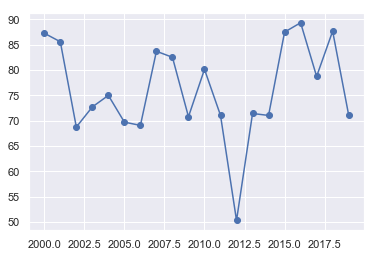

In [215]:
x=range(2000,2020)
y=(goodYears/(badYears+goodYears))*100
e=stdYears*0
plt.errorbar(x, y, e, fmt='-o')
plt.show()